# Lab: Simple Linear Regression
## CMSE 381 - Spring 2024


In the today's lectures, we are focused on simple linear regression, that is, fitting models of the form 
$$
Y =  \beta_0 +  \beta_1 X_1 + \varepsilon
$$
In this lab, we will use two different tools for linear regression. 
- [Scikit learn](https://scikit-learn.org/stable/index.html) is arguably the most used tool for machine learning in python 
- [Statsmodels](https://www.statsmodels.org) provides many of the statisitcial tests we've been learning in class

# 0. A note on datasets and ethics

For much of this course, we will follow the labs outlined in the textbook at the end of each section (albeit, translated into python).  However, there are many portions of this book that rely on the `Boston` data set. Although this dataset has been a standard example for a long time, often used for teaching linear regression, it has some major issues with assumptions based around race and housing. An excellent in-depth description of issues in the data set can be found [in this medium post from a few years ago](https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8). More recently, the data set has [marked as deprecated in scikit-learn 1.0](https://twitter.com/ogrisel/status/1442894248488046595), which essentially means that anyone loading it will encounter a warning, and is marked for removal in version 1.2.  For these reasons, we will not be using the dataset in this class. 

# 1. The Dataset

In [1]:
# As always, we start with our favorite standard imports. 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns


In this module, we will be using the `Diabetes` data set.  while we could download a csv to put in the correct folder yadda yadda yadda, because this is a commonly used test data set, it's available in `scikit-learn` for us to use without any cleanup. Yay!

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
diabetes = load_diabetes(as_frame=True)

In [4]:
# Notice that this loads in a lot of info into what is essentially a beastly dictionary.
print(type(diabetes))
diabetes

<class 'sklearn.utils._bunch.Bunch'>


{'data':           age       sex       bmi        bp        s1        s2        s3  \
 0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
 1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
 2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
 3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
 4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
 ..        ...       ...       ...       ...       ...       ...       ...   
 437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
 438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
 439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
 440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
 441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   
 
            s4        s5        s6  
 0   -0.002592  0

In [5]:
# But we can immediately get it into a pandas data frame for ease of use as follows 
diabetes_df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
diabetes_df['target'] = pd.Series(diabetes.target)

diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


## Info about the data set 

Look up the documentation about the dataset here: 

From https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset



&#9989; **<font color=red>Q:</font>** 
- Write a brief description of the data set. 
- What do the columns `s1` through `s6` correspond to? 
- Which of the available variables are quantitative? Which are categorical?
- What is the `target` that we are trying to predict?

*Your answer here*

----
# 2. Getting familiar with the data




The following command should show you the top of your data frame. 

In [6]:
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


&#9989; **<font color=red>Q:</font>** Do some basic data exploration. How many data points do we have? How many variables do we have? Are there any data points with missing data? 

*Your answer here*

&#9989; **<font color=red>Q:</font>** Use the seaborn `sns.pairplot` command to look at relationships between the variables. Are there pairs of variables that appear to be related? 

*Your answer here*

------

# 3. Simple Linear Regression

We're now going to fig to a simple linear regression to the models
$$
\texttt{target} = \beta_0 + \beta_1 \cdot\texttt{s1}
$$
and 
$$
\texttt{target} = \beta_0 + \beta_1 \cdot\texttt{s5}
$$
where the variables are 
- $\texttt{s1}$: tc, total serum cholesterol

- $\texttt{s5}$: ltg, possibly log of serum triglycerides level. 

Let's start by looking at using `s5` to predict `target`.




In [ ]:
from sklearn.linear_model import LinearRegression


# sklearn actually likes being handed numpy arrays more than 
# pandas dataframes, so we'll extract the bits we want and just pass it that. 
X = diabetes_df['s5'].values
X = X.reshape([len(X),1])
y = diabetes_df['target'].values
y = y.reshape([len(y),1])

# This code works by first creating an instance of 
# the linear regression class
reg = LinearRegression()
# Then we pass in the data we want it to use to fit.
reg.fit(X,y)

What the fork, nothing seems to have happened? Well actually, we first created an instance of the regression class, which is just a collection of the model functionality waiting to be trained. When we run the `fit` command with data handed in, it actually figures out the best choice of coefficients for our particular data. Once they're found, we can extract them from the class as follows.  

In [ ]:
# We can find the intercept and coefficient information 
# from the regression class as follows.

print(reg.coef_)
print(reg.intercept_)

&#9989; **<font color=red>Q:</font>** 
- What is the model using these coefficients? That is, write down the function $\hat f$ explicitly. 
- What is the prediction by the model for $\texttt{s5} = 0.05$? 

In [ ]:
# Your answer here

&#9989; **<font color=red>Q:</font>** Overlay a plot of your predicted model (your line) on a scatter plot of the data used. Does linear seem like a good assumption?

In [ ]:
# Your answer here

It turns out there is a bit of a cheap trick for plotting linear regression using seaborn.  This command will actually both run the linear regression (that is, find the required $\beta_i$'s) and plot it for you. The tradeoff is that this will only work for single variable linear regression; we'll have to work harder when we're doing multi-variable linear regression. They also do not provide any easy way to get the equation of the line out, so this isn't really the best tool to use for anything other than quick and dirty visualization.

In [ ]:
# First easy version, but hard to get out the parameters....
sns.regplot(x = diabetes_df.s5,y = diabetes_df.target)

# Simulating data 
Ok, let's run an example like was shown in class where we see the distribution of possible values. 

In [7]:
# Here's code that decides on my function 
def myFunc(x, b0=2, b1=5): 
    return b0 + b1*x


# Here's a command that generates 100 random data points from f(x) + epsilon
def makeData(n = 100):
    X = np.random.uniform(-2,2,n)
    y = myFunc(X) + np.random.normal(size = n)
    return X,y

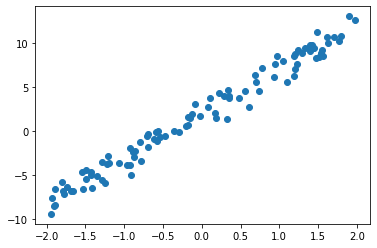

In [8]:
# Everytime you run this cell, you get slightly different data

X,y = makeData()

plt.scatter(X,y)

In [ ]:
# Which means that every time you run this cell, you get a slightly different choice of coefficients
# for the model learned

X,y = makeData()
X = X.reshape([len(X),1])
y = y.reshape([len(y),1])
reg = LinearRegression()
reg.fit(X,y)
print( 'y=' + str(round(reg.coef_[0,0],4)) +  "x_1 + " +  str(round(reg.intercept_[0],4)) )


In [ ]:
# So now, lets just train our linear model lots of times, and collect the resulting coefficients

beta0_list = []
beta1_list = []
for i in range(100):
    X,y = makeData()
    X = X.reshape([len(X),1])
    y = y.reshape([len(y),1])
    reg = LinearRegression()
    reg.fit(X,y)
    beta1_list.append(reg.coef_[0,0])
    beta0_list.append(reg.intercept_[0])

print(beta1_list)

&#9989; **<font color=red>Q:</font>** 
Make a histogram of `beta1_list` and separately, `beta0_list`.  What do you notice about the distributions?


In [ ]:
# Your code here

## Variance in estimation

To get the statistical test information, we will use the `statsmodels` package. You can take a look at the documentation here: www.statsmodels.org

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
# Notice that the code is intentially written to look
# more like R than like python, but it still works!
# Double check..... the coefficients here should be
# about the same as those found by scikit-learn
est = smf.ols('target ~ s5', diabetes_df).fit()
est.summary().tables[1]

&#9989; **<font color=red>Q:</font>** What is $SE(\hat \beta_0)$ and $SE(\hat \beta_1)$?

Your answer here. 

&#9989; **<font color=red>Q:</font>** If we instead use `s1` to predict the target, are $SE(\hat \beta_0)$ and $SE(\hat \beta_1)$ higher or lower than what you found for the `s5` prediction? Is this reasonable? Try plotting your predictions against scatter plots of the data to compare. 

In [ ]:
# Your code here. 



-----
### Congratulations, we're done!